# Data Science and Business Analytics

## Task 1 : Prediction Using Supervised ML
## Problem Statement : To predict the percentage of a student based on the no. of study hours
## What will be the predicted score if student studies for 9.25 hours per day

## Author : Shivam Deshpande

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the data

In [3]:
url="http://bit.ly/w-data"
data = pd.read_csv(url)

print(data.head(10))
print("\n Data imported successfully")

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25

 Data imported successfully


In [4]:
data.shape

(25, 2)

So our data consists of two columns i.e No. of study hours and Scores of students 

The overall data of 25 students

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### This gives us the statistical information about the data

In [6]:
# Lastly we will check if they are any missing values present in our dataset
data.isnull==True

False

#### This confirms that there are no null values in our dataset

### Plotting the data 

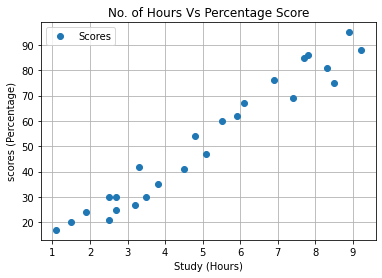

In [7]:
data.plot(x="Hours", y="Scores", style="o")
plt.title("No. of Hours Vs Percentage Score")
plt.xlabel("Study (Hours)")
plt.ylabel("scores (Percentage)")
plt.grid(True)
plt.show()

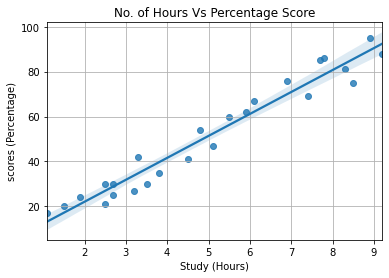

In [8]:
sns.regplot(x=data["Hours"], y=data["Scores"])
plt.title("No. of Hours Vs Percentage Score")
plt.xlabel("Study (Hours)")
plt.ylabel("scores (Percentage)")
plt.grid(True)
plt.show()

From the above plot we can infer that there is a positive relationship between the number of hours the student studies and the percentage of scores obtained

### Performing Train-Test Split

In [9]:
# Dividing the data into the two variables

X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values

So, we have created two variables from the dataset


In [10]:
# Train - Test Split
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

### Training the Linear Regression model on the dataset

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()
regressor.fit(X_train, Y_train)  
# By this line of code, we are fitting the data into the model

print("The model is trained")

The model is trained


### Now we are predicting the values based on test data

In [12]:
# test data of X
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
# We are predicting the percentage scores based on the X_test
Y_pred = regressor.predict(X_test)

In [14]:
# We are creating a dataframe by taking the X_test data and the predicted values
prediction = pd.DataFrame({"Hours": [i[0] for i in X_test], "Predicted Score":[k for k in Y_pred]})
prediction

,Hours,Predicted Score
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


This are the predicted scores of our model by giving it the X_test data

### Comparison of Actual Vs Predicted

In [16]:
# Let's do the comparison between the actual values and predicting values
# for this, we are comparing the data of Y_test and predicted Y valu

comparison = pd.DataFrame({"Actual" : Y_test, "Predicted": Y_pred})
comparison

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


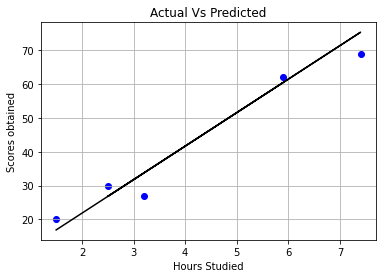

In [17]:
# Let's now compare the same using plot
plt.scatter(x=X_test, y=Y_test, color="blue")
plt.plot(X_test, Y_pred, color="black")
plt.title("Actual Vs Predicted")
plt.xlabel("Hours Studied")
plt.ylabel("Scores obtained")
plt.grid(True)
plt.show()

### To predict the score when student studies for 9.25 hours per day

In [19]:
# We are giving our own data in X
our_x = [9.25]
our_pred = regressor.predict([our_x])

In [20]:
print("No. of hours = {}".format(our_x))
print("Percentage of score obtained = {}".format(our_pred))

No. of hours = [9.25]
Percentage of score obtained = [93.69173249]


### The predicted score when the student studies for 9.25 hours per day is 93.69%

### Performance metrics for evaluation

### R square test of the model

R square value is one of the performance metrics of the machine learning model.
It is a statistical measure of how close the data is to the fitted regression line.
It is also known as coefficient of determination.

Higher the value of this test, the model performs better 

In [22]:
from sklearn.metrics import r2_score
print("The R square value of the model is: ", r2_score(Y_test, Y_pred))

The R square value of the model is:  0.9454906892105356


### R square value : 0.9454
### The value is closer to the one
### The model is performing very well 